# Take Home Notebook For NDTC

```
1. Main entities to track: 
    a. Campaigns
        i. Candidates
            1. Fields are: First name, Last name, District, Office
        ii. Volunteers
            1. Fields are: Belong to a candidate/campaign, Name, Role
    b. Events
        i. Event
            1. Fields are: What people staffed this event?, Money raised, Date, Start time, End time
        ii. Attendance/Leads
        1. Field are: Name, Contact info, Interested in volunteering?, Donation amount
Campaigns
candidates
fields are:
    first name
    Last name
    District
    Office

Volunteers

should belongs to a candidate/campaign Important fields are:

    Name
    role

Events

some things this entity should track

    name
    What people staffed this event?
    how much Money raised at this event
    Date
    Start time
    End time

Attendances / leads

    name
    Contact info
    Interested in volunteering?
    if so what kind of role?
    Donation amount?

```

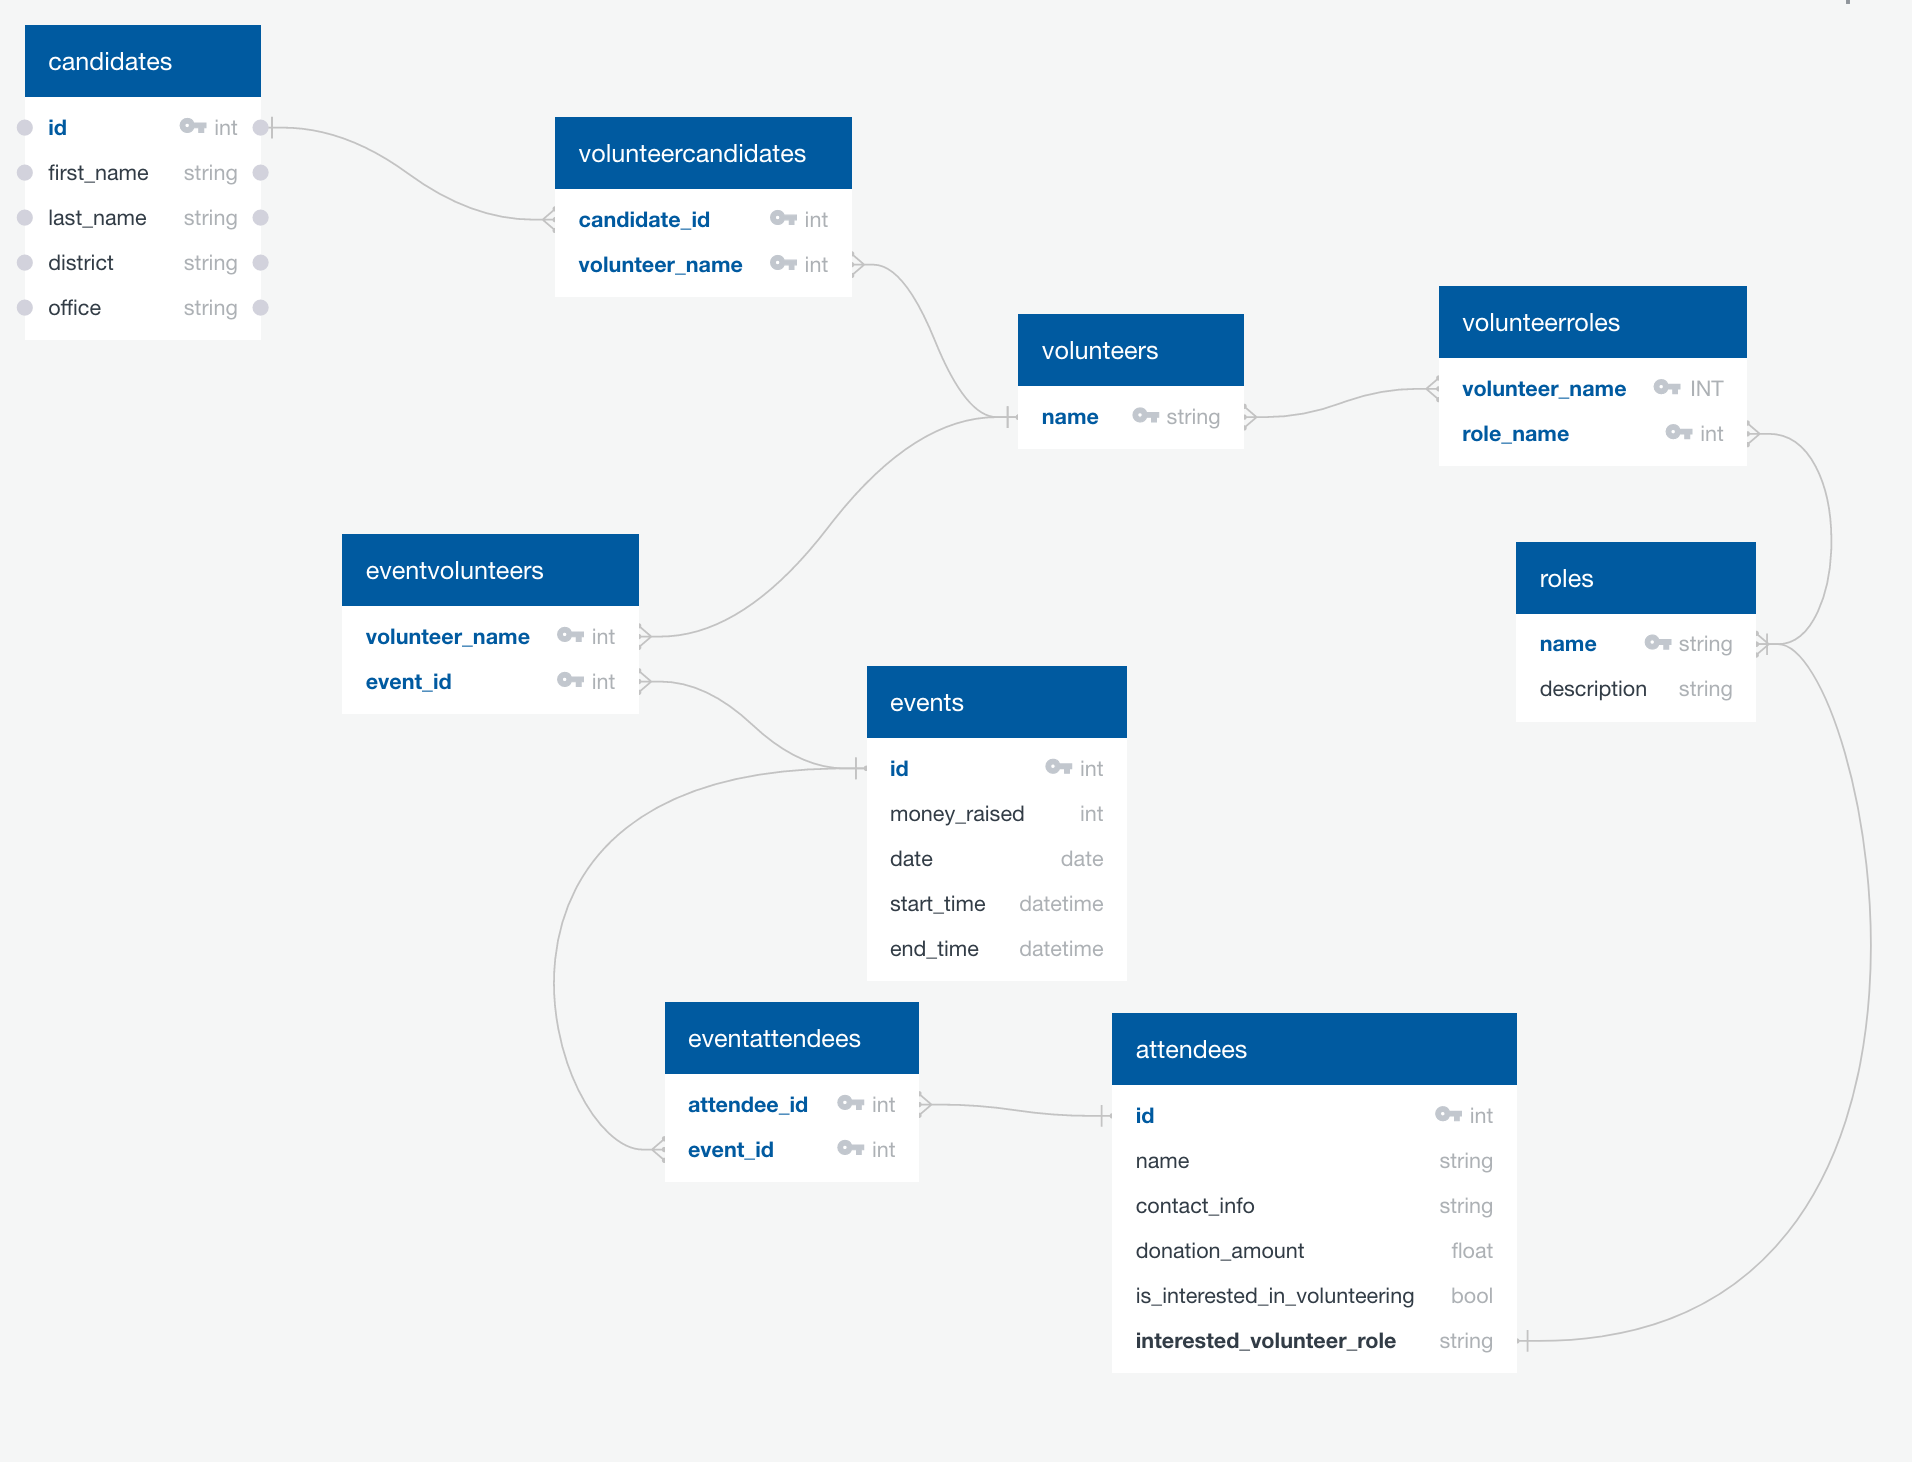

```
2. The service should be able to:
    a. Add / update / read candidates / volunteers
    b. Add / update / read events and attendances
    c. Filter and order results based on fields
    d. Order candidates based on money raised, attendance, donations of events
```

In [1]:
!curl -X POST  \
-H "Content-Type: application/json"  \
-d '{ "firstName": "Candy", "lastName": "Date", "district": "District1", "office": "Office1" }'  \
http://localhost:3000/candidate

{"id":1,"firstName":"Candy","lastName":"Date","district":"District1","office":"Office1","updatedAt":"2024-02-20T10:55:43.006Z","createdAt":"2024-02-20T10:55:43.006Z"}

In [2]:
!curl -X POST  \
-H "Content-Type: application/json"  \
-d '{ "firstName": "Jane", "lastName": "Doe", "district": "District2", "office": "Office2" }'  \
http://localhost:3000/candidate

{"id":2,"firstName":"Jane","lastName":"Doe","district":"District2","office":"Office2","updatedAt":"2024-02-20T10:55:43.191Z","createdAt":"2024-02-20T10:55:43.191Z"}

In [3]:
!curl -X POST  \
-H "Content-Type: application/json"  \
-d '{ "firstName": "Jane", "lastName": "Doe", "district": "District2", "office": "Office2" }'  \
http://localhost:3000/candidate

{"id":3,"firstName":"Jane","lastName":"Doe","district":"District2","office":"Office2","updatedAt":"2024-02-20T10:55:43.353Z","createdAt":"2024-02-20T10:55:43.353Z"}

In [4]:
!curl http://localhost:3000/candidates -vi


*   Trying [::1]:3000...
* Connected to localhost (::1) port 3000
> GET /candidates HTTP/1.1
> Host: localhost:3000
> User-Agent: curl/8.3.0
> Accept: */*
> 
< HTTP/1.1 200 OK
HTTP/1.1 200 OK
< vary: Origin
vary: Origin
< access-control-allow-origin: *
access-control-allow-origin: *
< content-type: application/json; charset=utf-8
content-type: application/json; charset=utf-8
< content-length: 546
content-length: 546
< Date: Tue, 20 Feb 2024 10:55:43 GMT
Date: Tue, 20 Feb 2024 10:55:43 GMT
< Connection: keep-alive
Connection: keep-alive
< Keep-Alive: timeout=72
Keep-Alive: timeout=72

< 
* Connection #0 to host localhost left intact
[{"id":1,"firstName":"Candy","lastName":"Date","district":"District1","office":"Office1","createdAt":"2024-02-20T10:55:43.006Z","updatedAt":"2024-02-20T10:55:43.006Z","Volunteers":[]},{"id":2,"firstName":"Jane","lastName":"Doe","district":"District2","office":"Office2","createdAt":"2024-02-20T10:55:43.191Z","updatedAt":"2024-02-20T10:55:43.191Z","Volunteers"

In [5]:
! curl -X PUT \
     -H "Content-Type: application/json" \
     -d '{"firstName": "UpdatedFirstName", "lastName": "UpdatedLastName", "district": "UpdatedDistrict", "office": "UpdatedOffice"}' \
     http://localhost:3000/candidate/1

{"id":1,"firstName":"UpdatedFirstName","lastName":"UpdatedLastName","district":"UpdatedDistrict","office":"UpdatedOffice","createdAt":"2024-02-20T10:55:43.006Z","updatedAt":"2024-02-20T10:55:43.713Z"}

In [6]:
!curl http://localhost:3000/candidate/1

{"id":1,"firstName":"UpdatedFirstName","lastName":"UpdatedLastName","district":"UpdatedDistrict","office":"UpdatedOffice","createdAt":"2024-02-20T10:55:43.006Z","updatedAt":"2024-02-20T10:55:43.713Z"}

# Role

In [7]:
!curl -X POST http://localhost:3000/role \
     -H "Content-Type: application/json" \
     -d '{"name": "Cold Caller", "description": "Calls Phones"}'

{"id":1,"name":"Cold Caller","description":"Calls Phones","updatedAt":"2024-02-20T10:55:44.020Z","createdAt":"2024-02-20T10:55:44.020Z"}

In [8]:
!curl -X PUT -H "Content-Type: application/json" \
-d '{"name":"Updated Role Name","description":"Updated role description"}' \
http://localhost:3000/role/1


{"message":"Role updated successfully","role":{"id":1,"name":"Updated Role Name","description":"Updated role description","createdAt":"2024-02-20T10:55:44.020Z","updatedAt":"2024-02-20T10:55:44.179Z"}}

In [9]:
!curl http://localhost:3000/candidate/1

{"id":1,"firstName":"UpdatedFirstName","lastName":"UpdatedLastName","district":"UpdatedDistrict","office":"UpdatedOffice","createdAt":"2024-02-20T10:55:43.006Z","updatedAt":"2024-02-20T10:55:43.713Z"}

In [10]:
!curl http://localhost:3000/role/1

{"id":1,"name":"Updated Role Name","description":"Updated role description","createdAt":"2024-02-20T10:55:44.020Z","updatedAt":"2024-02-20T10:55:44.179Z"}

In [11]:
!curl http://localhost:3000/roles

[{"id":1,"name":"Updated Role Name","description":"Updated role description","createdAt":"2024-02-20T10:55:44.020Z","updatedAt":"2024-02-20T10:55:44.179Z"}]

# volunteer

In [12]:
!curl -X POST \
     -H "Content-Type: application/json" \
     -d '{ "name": "Volo Tier", "candidateId": 1, "roleName": "Cold Caller"}' \
     http://localhost:3000/volunteer

{"id":1,"name":"Volo Tier","updatedAt":"2024-02-20T10:55:44.823Z","createdAt":"2024-02-20T10:55:44.823Z"}

In [13]:
!curl -X POST \
     -H "Content-Type: application/json" \
     -d '{ "name": "Valrie Deer", "candidateId": 1, "roleName": "Cold Caller"}' \
     http://localhost:3000/volunteer

{"id":2,"name":"Valrie Deer","updatedAt":"2024-02-20T10:55:44.998Z","createdAt":"2024-02-20T10:55:44.998Z"}

In [14]:
!curl http://localhost:3000/volunteer/1 | jq

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   465  100   465    0     0  49526      0 --:--:-- --:--:-- --:--:-- 51666
{
  "id": 1,
  "name": "Volo Tier",
  "createdAt": "2024-02-20T10:55:44.823Z",
  "updatedAt": "2024-02-20T10:55:44.823Z",
  "Roles": [],
  "Candidates": [
    {
      "id": 1,
      "firstName": "UpdatedFirstName",
      "lastName": "UpdatedLastName",
      "district": "UpdatedDistrict",
      "office": "UpdatedOffice",
      "createdAt": "2024-02-20T10:55:43.006Z",
      "updatedAt": "2024-02-20T10:55:43.713Z",
      "VolunteerCandidate": {
        "createdAt": "2024-02-20T10:55:44.828Z",
        "updatedAt": "2024-02-20T10:55:44.828Z",
        "CandidateId": 1,
        "VolunteerId": 1
      }
    }
  ]
}


In [15]:
!curl http://localhost:3000/volunteers | jq

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   935  100   935    0     0   117k      0 --:--:-- --:--:-- --:--:--  130k
[
  {
    "id": 2,
    "name": "Valrie Deer",
    "createdAt": "2024-02-20T10:55:44.998Z",
    "updatedAt": "2024-02-20T10:55:44.998Z",
    "Roles": [],
    "Candidates": [
      {
        "id": 1,
        "firstName": "UpdatedFirstName",
        "lastName": "UpdatedLastName",
        "district": "UpdatedDistrict",
        "office": "UpdatedOffice",
        "createdAt": "2024-02-20T10:55:43.006Z",
        "updatedAt": "2024-02-20T10:55:43.713Z",
        "VolunteerCandidate": {
          "createdAt": "2024-02-20T10:55:45.005Z",
          "updatedAt": "2024-02-20T10:55:45.005Z",
          "CandidateId": 1,
          "VolunteerId": 2
        }
      }
    ]
  },
  {
    "id": 1,
    "name": "Volo Tier",
    "createdAt": "2024-02-20T10:55:44.823Z",
    "upd

In [16]:
!curl 'http://localhost:3000/volunteers?name=Volo%20Tier'

[{"id":1,"name":"Volo Tier","createdAt":"2024-02-20T10:55:44.823Z","updatedAt":"2024-02-20T10:55:44.823Z","Roles":[],"Candidates":[{"id":1,"firstName":"UpdatedFirstName","lastName":"UpdatedLastName","district":"UpdatedDistrict","office":"UpdatedOffice","createdAt":"2024-02-20T10:55:43.006Z","updatedAt":"2024-02-20T10:55:43.713Z","VolunteerCandidate":{"createdAt":"2024-02-20T10:55:44.828Z","updatedAt":"2024-02-20T10:55:44.828Z","CandidateId":1,"VolunteerId":1}}]}]

In [17]:
!curl http://localhost:3000/candidates | jq

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   546  100   546    0     0   238k      0 --:--:-- --:--:-- --:--:--  266k
[
  {
    "id": 1,
    "firstName": "Candy",
    "lastName": "Date",
    "district": "District1",
    "office": "Office1",
    "createdAt": "2024-02-20T10:55:43.006Z",
    "updatedAt": "2024-02-20T10:55:43.006Z",
    "Volunteers": []
  },
  {
    "id": 2,
    "firstName": "Jane",
    "lastName": "Doe",
    "district": "District2",
    "office": "Office2",
    "createdAt": "2024-02-20T10:55:43.191Z",
    "updatedAt": "2024-02-20T10:55:43.191Z",
    "Volunteers": []
  },
  {
    "id": 3,
    "firstName": "Jane",
    "lastName": "Doe",
    "district": "District2",
    "office": "Office2",
    "createdAt": "2024-02-20T10:55:43.353Z",
    "updatedAt": "2024-02-20T10:55:43.353Z",
    "Volunteers": []
  }
]


In [18]:
!curl "http://localhost:3000/candidates?office=UpdatedOffice&district=UpdatedDistrict" | jq

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   697  100   697    0     0   109k      0 --:--:-- --:--:-- --:--:--  113k
[
  {
    "id": 1,
    "firstName": "UpdatedFirstName",
    "lastName": "UpdatedLastName",
    "district": "UpdatedDistrict",
    "office": "UpdatedOffice",
    "createdAt": "2024-02-20T10:55:43.006Z",
    "updatedAt": "2024-02-20T10:55:43.713Z",
    "Volunteers": [
      {
        "id": 1,
        "name": "Volo Tier",
        "createdAt": "2024-02-20T10:55:44.823Z",
        "updatedAt": "2024-02-20T10:55:44.823Z",
        "VolunteerCandidate": {
          "createdAt": "2024-02-20T10:55:44.828Z",
          "updatedAt": "2024-02-20T10:55:44.828Z",
          "CandidateId": 1,
          "VolunteerId": 1
        }
      },
      {
        "id": 2,
        "name": "Valrie Deer",
        "createdAt": "2024-02-20T10:55:44.998Z",
        "updatedAt": "2024-02-2

In [19]:
!curl "http://localhost:3000/candidates?order=desc&district=District2" | jq

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   363  100   363    0     0  66459      0 --:--:-- --:--:-- --:--:-- 72600
[
  {
    "id": 2,
    "firstName": "Jane",
    "lastName": "Doe",
    "district": "District2",
    "office": "Office2",
    "createdAt": "2024-02-20T10:55:43.191Z",
    "updatedAt": "2024-02-20T10:55:43.191Z",
    "Volunteers": []
  },
  {
    "id": 3,
    "firstName": "Jane",
    "lastName": "Doe",
    "district": "District2",
    "office": "Office2",
    "createdAt": "2024-02-20T10:55:43.353Z",
    "updatedAt": "2024-02-20T10:55:43.353Z",
    "Volunteers": []
  }
]


In [20]:
!curl "http://localhost:3000/candidates?order=desc" | jq

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1059  100  1059    0     0   160k      0 --:--:-- --:--:-- --:--:--  172k
[
  {
    "id": 1,
    "firstName": "UpdatedFirstName",
    "lastName": "UpdatedLastName",
    "district": "UpdatedDistrict",
    "office": "UpdatedOffice",
    "createdAt": "2024-02-20T10:55:43.006Z",
    "updatedAt": "2024-02-20T10:55:43.713Z",
    "Volunteers": [
      {
        "id": 1,
        "name": "Volo Tier",
        "createdAt": "2024-02-20T10:55:44.823Z",
        "updatedAt": "2024-02-20T10:55:44.823Z",
        "VolunteerCandidate": {
          "createdAt": "2024-02-20T10:55:44.828Z",
          "updatedAt": "2024-02-20T10:55:44.828Z",
          "CandidateId": 1,
          "VolunteerId": 1
        }
      },
      {
        "id": 2,
        "name": "Valrie Deer",
        "createdAt": "2024-02-20T10:55:44.998Z",
        "updatedAt": "2024-02-2

In [21]:
!curl "http://localhost:3000/volunteers?name=Volo%20Tier" | jq

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   467  100   467    0     0  65626      0 --:--:-- --:--:-- --:--:-- 66714
[
  {
    "id": 1,
    "name": "Volo Tier",
    "createdAt": "2024-02-20T10:55:44.823Z",
    "updatedAt": "2024-02-20T10:55:44.823Z",
    "Roles": [],
    "Candidates": [
      {
        "id": 1,
        "firstName": "UpdatedFirstName",
        "lastName": "UpdatedLastName",
        "district": "UpdatedDistrict",
        "office": "UpdatedOffice",
        "createdAt": "2024-02-20T10:55:43.006Z",
        "updatedAt": "2024-02-20T10:55:43.713Z",
        "VolunteerCandidate": {
          "createdAt": "2024-02-20T10:55:44.828Z",
          "updatedAt": "2024-02-20T10:55:44.828Z",
          "CandidateId": 1,
          "VolunteerId": 1
        }
      }
    ]
  }
]


In [22]:
!curl http://localhost:3000/volunteer/1 | jq

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   465  100   465    0     0  99104      0 --:--:-- --:--:-- --:--:--  113k
{
  "id": 1,
  "name": "Volo Tier",
  "createdAt": "2024-02-20T10:55:44.823Z",
  "updatedAt": "2024-02-20T10:55:44.823Z",
  "Roles": [],
  "Candidates": [
    {
      "id": 1,
      "firstName": "UpdatedFirstName",
      "lastName": "UpdatedLastName",
      "district": "UpdatedDistrict",
      "office": "UpdatedOffice",
      "createdAt": "2024-02-20T10:55:43.006Z",
      "updatedAt": "2024-02-20T10:55:43.713Z",
      "VolunteerCandidate": {
        "createdAt": "2024-02-20T10:55:44.828Z",
        "updatedAt": "2024-02-20T10:55:44.828Z",
        "CandidateId": 1,
        "VolunteerId": 1
      }
    }
  ]
}


In [23]:
!curl -X POST \
     -H "Content-Type: application/json" \
     -d '{"moneyRaised":  1000, "date": "2023-04-01", "startTime": "2023-04-01T10:00:00Z", "endTime": "2023-04-01T18:00:00Z", "staff": [1, 2]}' \
     http://localhost:3000/event | jq

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   348  100   215  100   133  22291  13789 --:--:-- --:--:-- --:--:-- 38666
{
  "id": 1,
  "moneyRaised": 1000,
  "date": "2023-04-01",
  "startTime": "2023-04-01T10:00:00.000Z",
  "endTime": "2023-04-01T18:00:00.000Z",
  "staff": [
    1,
    2
  ],
  "updatedAt": "2024-02-20T10:55:47.690Z",
  "createdAt": "2024-02-20T10:55:47.690Z"
}


In [24]:
!curl http://localhost:3000/event | jq

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   723  100   723    0     0   111k      0 --:--:-- --:--:-- --:--:--  117k
[
  {
    "id": 1,
    "moneyRaised": 1000,
    "date": "2023-04-01",
    "startTime": "2023-04-01T10:00:00.000Z",
    "endTime": "2023-04-01T18:00:00.000Z",
    "staff": "[object Object]",
    "createdAt": "2024-02-20T10:55:47.690Z",
    "updatedAt": "2024-02-20T10:55:47.690Z",
    "Volunteers": [
      {
        "id": 1,
        "name": "Volo Tier",
        "createdAt": "2024-02-20T10:55:44.823Z",
        "updatedAt": "2024-02-20T10:55:44.823Z",
        "EventVolunteer": {
          "createdAt": "2024-02-20T10:55:47.696Z",
          "updatedAt": "2024-02-20T10:55:47.696Z",
          "VolunteerId": 1,
          "EventId": 1
        }
      },
      {
        "id": 2,
        "name": "Valrie Deer",
        "createdAt": "2024-02-20T10:55:44.998Z",
      

In [25]:
!curl -X PUT \
     -H "Content-Type: application/json" \
     -d '{"moneyRaised":  1, "date": "2023-04-15","startTime": "2023-04-15T10:00:00Z","endTime": "2023-04-15T18:00:00Z", "staff": [1]}' \
     http://localhost:3000/event/1

{"message":"Event updated successfully","event":{"id":1,"moneyRaised":1,"date":"2023-04-15","startTime":"2023-04-15T10:00:00.000Z","endTime":"2023-04-15T18:00:00.000Z","staff":[1],"createdAt":"2024-02-20T10:55:47.690Z","updatedAt":"2024-02-20T10:55:48.292Z"}}

In [26]:
!curl http://localhost:3000/event | jq

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   723  100   723    0     0   424k      0 --:--:-- --:--:-- --:--:--  706k
[
  {
    "id": 1,
    "moneyRaised": 1000,
    "date": "2023-04-01",
    "startTime": "2023-04-01T10:00:00.000Z",
    "endTime": "2023-04-01T18:00:00.000Z",
    "staff": "[object Object]",
    "createdAt": "2024-02-20T10:55:47.690Z",
    "updatedAt": "2024-02-20T10:55:47.690Z",
    "Volunteers": [
      {
        "id": 1,
        "name": "Volo Tier",
        "createdAt": "2024-02-20T10:55:44.823Z",
        "updatedAt": "2024-02-20T10:55:44.823Z",
        "EventVolunteer": {
          "createdAt": "2024-02-20T10:55:47.696Z",
          "updatedAt": "2024-02-20T10:55:47.696Z",
          "VolunteerId": 1,
          "EventId": 1
        }
      },
      {
        "id": 2,
        "name": "Valrie Deer",
        "createdAt": "2024-02-20T10:55:44.998Z",
      

In [27]:
!curl -X POST \
     -H "Content-Type: application/json" \
     -d '{ "name": "John Doe", "contactInfo": "john.doe@example.com", "isInterestedInVolunteering": true, "donationAmount":  50.00, "interestedVolunteerRole": "Event Organizer", "eventID":  1 }' \
     http://localhost:3000/attendee | jq

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   423  100   239  100   184  20603  15862 --:--:-- --:--:-- --:--:-- 38454
{
  "id": 1,
  "name": "John Doe",
  "contactInfo": "john.doe@example.com",
  "isInterestedInVolunteering": true,
  "donationAmount": 50,
  "interestedVolunteerRole": "Event Organizer",
  "updatedAt": "2024-02-20T10:55:48.751Z",
  "createdAt": "2024-02-20T10:55:48.751Z"
}


In [28]:
!curl -X POST \
 -H "Content-Type: application/json" \
 -d '{"name": "bob Doe", "contactInfo": "jane.doe@example.com", "isInterestedInVolunteering": true, "donationAmount":   100.00, "interestedVolunteerRole": "Event Organizer", "eventID":   1 }' \
 http://localhost:3000/attendee | jq

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   424  100   239  100   185  27936  21624 --:--:-- --:--:-- --:--:-- 53000
{
  "id": 2,
  "name": "bob Doe",
  "contactInfo": "jane.doe@example.com",
  "isInterestedInVolunteering": true,
  "donationAmount": 100,
  "interestedVolunteerRole": "Event Organizer",
  "updatedAt": "2024-02-20T10:55:49.058Z",
  "createdAt": "2024-02-20T10:55:49.058Z"
}


In [29]:
!sqlite3 database.sqlite .tables

Attendees           EventVolunteer      VolunteerCandidate
Candidates          Events              VolunteerRole     
EventAttendee       Roles               Volunteers        


In [30]:
# !sqlite3 database.sqlite "SELECT * FROM VolunteerCandidates;"

In [31]:
!sqlite3 database.sqlite ".fullschema"

CREATE TABLE `Candidates` (`id` INTEGER PRIMARY KEY AUTOINCREMENT, `firstName` VARCHAR(255), `lastName` VARCHAR(255), `district` VARCHAR(255), `office` VARCHAR(255), `createdAt` DATETIME NOT NULL, `updatedAt` DATETIME NOT NULL);
CREATE TABLE `Volunteers` (`id` INTEGER PRIMARY KEY AUTOINCREMENT, `name` VARCHAR(255), `createdAt` DATETIME NOT NULL, `updatedAt` DATETIME NOT NULL);
CREATE TABLE `VolunteerCandidate` (`createdAt` DATETIME NOT NULL, `updatedAt` DATETIME NOT NULL, `CandidateId` INTEGER NOT NULL REFERENCES `Candidates` (`id`) ON DELETE CASCADE ON UPDATE CASCADE, `VolunteerId` INTEGER NOT NULL REFERENCES `Volunteers` (`id`) ON DELETE CASCADE ON UPDATE CASCADE, PRIMARY KEY (`CandidateId`, `VolunteerId`));
CREATE TABLE `Roles` (`id` INTEGER PRIMARY KEY AUTOINCREMENT, `name` VARCHAR(255), `description` TEXT, `createdAt` DATETIME NOT NULL, `updatedAt` DATETIME NOT NULL);
CREATE TABLE `VolunteerRole` (`createdAt` DATETIME NOT NULL, `updatedAt` DATETIME NOT NULL, `VolunteerId` INTEGER 

In [32]:
#!sqlite3 database.sqlite ".help"

In [33]:
!sqlite3 database.sqlite "SELECT * FROM Roles;"

1|Updated Role Name|Updated role description|2024-02-20 10:55:44.020 +00:00|2024-02-20 10:55:44.179 +00:00


In [34]:
!sqlite3 database.sqlite "SELECT * FROM Candidates;"

1|UpdatedFirstName|UpdatedLastName|UpdatedDistrict|UpdatedOffice|2024-02-20 10:55:43.006 +00:00|2024-02-20 10:55:43.713 +00:00
2|Jane|Doe|District2|Office2|2024-02-20 10:55:43.191 +00:00|2024-02-20 10:55:43.191 +00:00
3|Jane|Doe|District2|Office2|2024-02-20 10:55:43.353 +00:00|2024-02-20 10:55:43.353 +00:00


3. Bonus:
    a. Generate a time series graph showing attendance / donation amount /volunteer signups of candidates over time
```
    x = event start time
    y= Number of attendees(eventattendees)/donation amount(attendees)/
    
    
    x=  createdAt volunteer table 
    y = grouped by candidates agg count(VolunteerCandidate)

```



In [35]:
import pandas as pd

#    b. Build this using any db or framework that makes sense to you


# c. Implement some type of caching system for this

Redis/Sqlite In-memory


# Have a deployment plan ready to walk thru and discuss


```
# Coolify
# DockerImage
# Railway
# HA K8 ECR
# CA-Certs
```

# Will you do this serverless or on a running instance? Tell us about it

```
Depends on requirements...
Cost?
Latency?
Analytics?
Egress?
```


# TODOs

```
* Explore Volunteer Tasks
* DockerFile
* DevContainer
* Hurl CI/CD Integration Tests
* Swagger Plugin for fastify
* Github Actions
* Postman/JSON requests
* Create models folder and abstract out the models from app.js 
* Create routes folder  and abstract out the routes from app.js
* HEAD/OPTIONS
* Better Logging.
* Testing
* Cache-Status

```